***
# <font color=blue size=10>EXERCICIOS - ANÁLISE DESCRITIVA</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=blue>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='lightblue'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='lightblue'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [90]:
dados = pd.read_csv('https://raw.githubusercontent.com/DiogoWorkGit/Python_Notebooks/master/csv/dados.csv')

### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
classes = [0, 788*2, 788*5, 788*15, 788*25, dados.Renda.max()]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [6]:
label = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [7]:
frequencia = pd.cut(
    dados.Renda,
    bins= classes,
    labels= label,
    include_lowest= True
).value_counts()
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
percentuais = pd.cut(
    dados.Renda,
    bins= classes,
    labels= label,
    include_lowest= True
).value_counts(normalize= True)*100
percentuais

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [53]:
frequencia_classific_rendas = pd.DataFrame({
    'Frequencia': frequencia,
    'Porcentagem (%)': percentuais
})
frequencia_classific_rendas.sort_values(by= 'Frequencia', ascending=True)

,Frequencia,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

In [54]:
frequencia_classific_rendas['Frequencia']

E    49755
D    18602
C     7241
B      822
A      420
Name: Frequencia, dtype: int64

In [55]:
df = frequencia_classific_rendas.reset_index()
df

,index,Frequencia,Porcentagem (%)
0,E,49755,64.751432
1,D,18602,24.208745
2,C,7241,9.423477
3,B,822,1.069755
4,A,420,0.546590


<Axes: title={'center': 'Frequência entre classificações - Renda'}, xlabel='Classificações', ylabel='Frequência'>

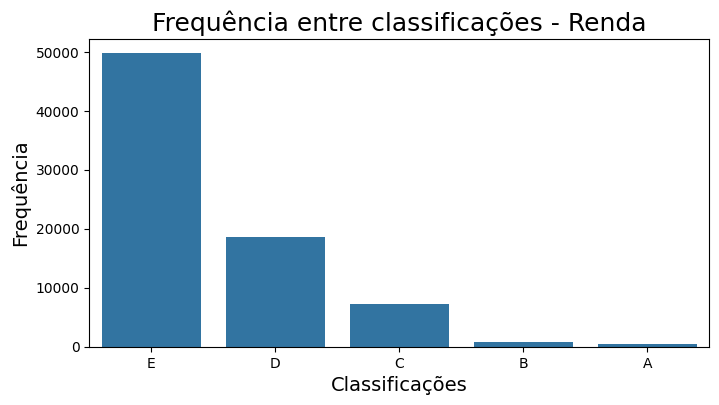

In [60]:
ax = sns.barplot(data= df, x='index', y='Frequencia')
ax.figure.set_size_inches(8, 4)
ax.set_title('Frequência entre classificações - Renda', fontsize=18)
ax.set_xlabel('Classificações', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
ax

> ### Conclusões

Basicamente é possível observar que grande parte da renda da população do nosso dataset está localizada dentro da classe E (até 2 salarios minimos = 1576) e D (entre 2 e 5 salários minimos = 1576 ~ 3940) que representa 88% ddo dataset

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [63]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

<Axes: title={'center': 'Histograma - Idade'}, xlabel='Idade', ylabel='Count'>

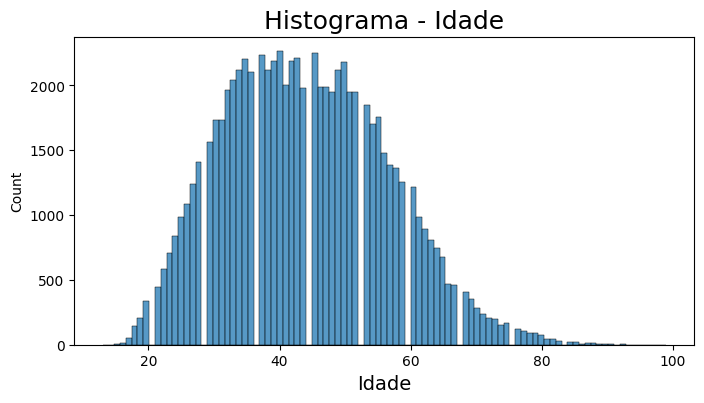

In [66]:
ax = sns.histplot(data= dados.Idade)
ax.figure.set_size_inches(8, 4)
ax.set_title('Histograma - Idade', fontsize=18)
ax.set_xlabel('Idade', fontsize=14)
ax

Conclusões sobre a variavel Idade:
- O gráfico nos apresentou uma assimetria a esquerda, ou seja a maior parte das informações encontradas se encontra no começo da distribuição entre 20~60 anos de idade
- Um motivo para isso pode ser que grande parte dos chefes de familia (detentores da renda) se encontram nessas idades, que são idades propicias ao trabalho corporativo.

<Axes: title={'center': 'Histograma - Altura'}, xlabel='Altura (m)', ylabel='Count'>

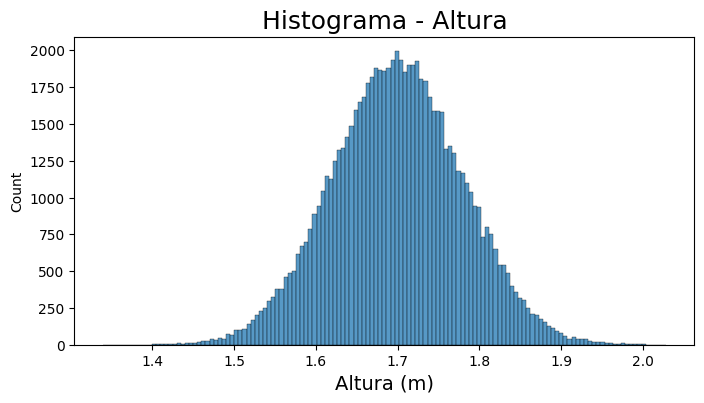

In [69]:
ax = sns.histplot(data= dados.Altura)
ax.figure.set_size_inches(8, 4)
ax.set_title('Histograma - Altura', fontsize=18)
ax.set_xlabel('Altura (m)', fontsize=14)
ax

Conclusões sobre a variavel Altura:
- O gráfico nos apresentou uma simetria, ou seja a maior parte das informações encontradas se encontra no meio da distribuição entre 1.6~1.8 metros de altura
- Um motivo para isso pode ser pela média de altura no Brasil ser de entre 1.68 ~ 1.74

<Axes: title={'center': 'Histograma - Renda'}, xlabel='Renda', ylabel='Count'>

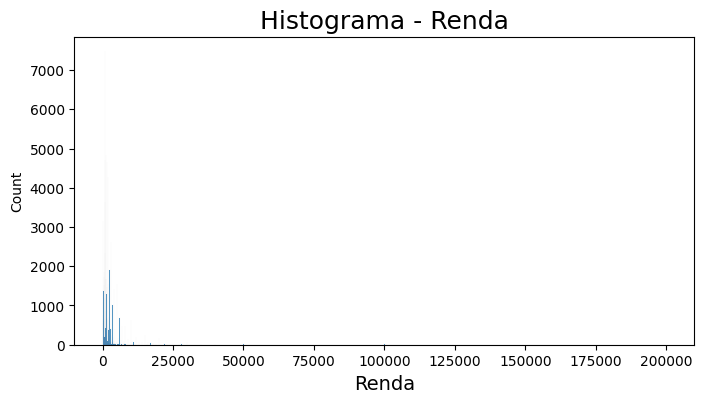

In [71]:
ax = sns.histplot(data= dados.Renda)
ax.figure.set_size_inches(8, 4)
ax.set_title('Histograma - Renda', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax

Nessa visualização não conseguimos entender os dados com clareza, será melhor se procurarmos diminuir o area para conseguirmos observar com mais clareza

In [78]:
dados.sort_values(by= 'Renda', ascending=True).tail(30)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
36894,31,0,49,2,16,50000,1.579991
53155,35,1,73,2,16,50000,1.727569
45242,33,0,49,8,16,50000,1.664175
43678,33,0,73,2,5,50000,1.651894
9343,15,0,59,6,12,50000,1.718788
990,11,0,33,2,16,50000,1.632056
50834,35,1,53,2,12,50000,1.572529
43638,33,0,63,2,16,50000,1.754517
39231,31,0,40,2,16,57000,1.742436
51264,35,0,53,2,16,58000,1.579180


<Axes: title={'center': 'Histograma - Renda'}, xlabel='Renda', ylabel='Count'>

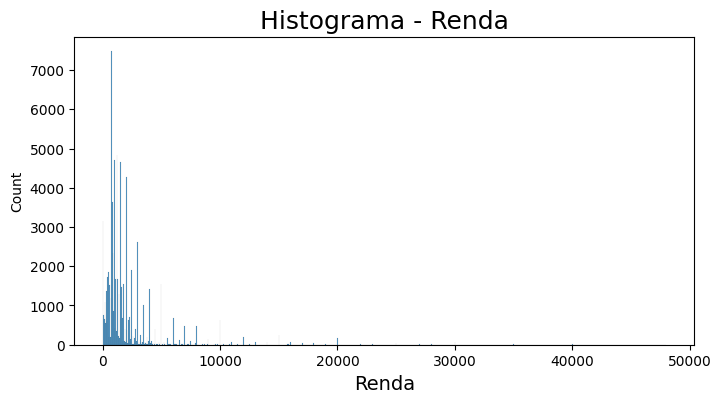

In [80]:
# Vamos diminuir os valores da renda até 50000 pois assim conseguimos viusalizar os dados sem perder muitas informações
ax = sns.histplot(data= dados.query('Renda < 50000')['Renda'])
ax.figure.set_size_inches(8, 4)
ax.set_title('Histograma - Renda', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax

Conclusões sobre a variavel Renda:
- O gráfico nos apresentou uma assimetria a esquerda, ou seja a maior parte das informações encontradas se encontra no começo da distribuição entre 0~5000 reais de renda
- Um motivo para isso pode ser pelo Brasil ter uma concentração de riqueza muito grande, fazendo com que uma pequena parte da população detenha grande parte da renda

> ### Conclusões

No geral foi possível observar a dispersão da variaveis quantitativas que estão no nosso dataset

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: title={'center': 'Histograma - Renda'}, xlabel='Renda', ylabel='Count'>

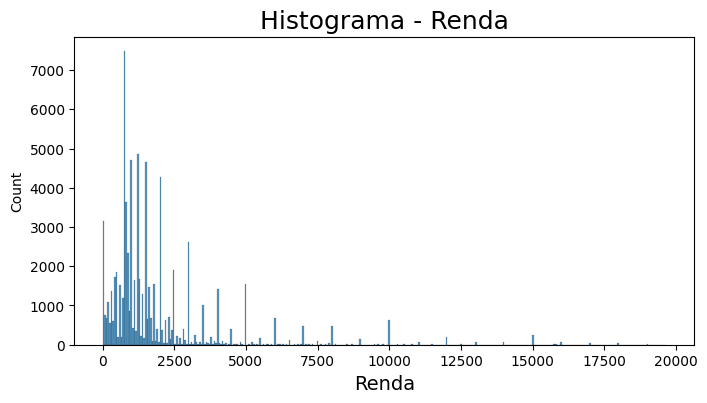

In [81]:
# Vamos diminuir os valores da renda até 50000 pois assim conseguimos viusalizar os dados sem perder muitas informações
ax = sns.histplot(data= dados.query('Renda < 20000')['Renda'])
ax.figure.set_size_inches(8, 4)
ax.set_title('Histograma - Renda', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando as variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='lightblue'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [94]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [95]:
dados_nomes_alterados = dados.copy()
dados_nomes_alterados.replace({'Anos de Estudo': anos_de_estudo}, inplace= True)
dados_nomes_alterados.replace({'Cor': cor}, inplace= True)
dados_nomes_alterados.replace({'Sexo': sexo}, inplace= True)
dados_nomes_alterados.replace({'UF': uf}, inplace= True)
dados_nomes_alterados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631
...,...,...,...,...,...,...,...
76835,Distrito Federal,Feminino,46,Branca,10 anos,812,1.687030
76836,Distrito Federal,Masculino,30,Preta,6 anos,1500,1.792934
76837,Distrito Federal,Masculino,32,Parda,11 anos,1300,1.830587
76838,Distrito Federal,Masculino,57,Parda,3 anos,1500,1.726344


In [112]:
frequencia = pd.crosstab(dados_nomes_alterados.Cor, dados_nomes_alterados.Sexo)
frequencia.sort_values(by=['Feminino', 'Masculino'], ascending= False, inplace= True)
frequencia

Sexo,Feminino,Masculino
Cor,,
Parda,10862,25063
Branca,9621,22194
Preta,2889,5502
Amarela,117,235
Indígena,101,256


In [113]:
porcentual = pd.crosstab(dados_nomes_alterados.Cor, dados_nomes_alterados.Sexo, normalize='all')*100
porcentual.sort_values(by=['Feminino', 'Masculino'], ascending= False, inplace= True)
porcentual

Sexo,Feminino,Masculino
Cor,,
Parda,14.135867,32.617126
Branca,12.520822,28.883394
Preta,3.759761,7.160333
Amarela,0.152264,0.305830
Indígena,0.131442,0.333160


In [114]:
pd.concat([frequencia, porcentual], keys=['Frequência', 'Porcentagem(%)'])

Sexo                         Feminino     Masculino
               Cor                                 
Frequência     Parda     10862.000000  25063.000000
               Branca     9621.000000  22194.000000
               Preta      2889.000000   5502.000000
               Amarela     117.000000    235.000000
               Indígena    101.000000    256.000000
Porcentagem(%) Parda        14.135867     32.617126
               Branca       12.520822     28.883394
               Preta         3.759761      7.160333
               Amarela       0.152264      0.305830
               Indígena      0.131442      0.333160

> ### Conclusões

Com o cruzamento de informações que foi observado, é possível entender que, na população do nosso dataframe, a população Parda é a mais presente  em ambos os sexos representando 46% da população, é mais presente em ambos os sexos, e a menos presente, é a população Indígina, que em ambos os sexos representa somente 0,46% da população.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [115]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [116]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [120]:
dados.Renda.mode()

# Nossa variavel Renda é bi-modal

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [122]:
(dados.Renda - dados.Renda.mean()).abs().mean()

1526.4951371638058

### Obtenha a variância

In [123]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [124]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='lightblue'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [129]:
pd.crosstab(index= dados_nomes_alterados.Cor,
            columns= dados_nomes_alterados.Sexo,
            values=dados_nomes_alterados.Renda,
            aggfunc= {'mean','median', 'max'})

max                   mean                median          
Sexo     Feminino Masculino     Feminino    Masculino Feminino Masculino
Cor                                                                     
Amarela     20000     50000  3027.341880  4758.251064   1500.0    2800.0
Branca     100000    200000  2109.866750  2925.744435   1200.0    1700.0
Indígena   120000     10000  2464.386139  1081.710938    788.0     797.5
Parda       30000    100000  1176.758516  1659.577425    800.0    1200.0
Preta       23000     50000  1134.596400  1603.861687    800.0    1200.0

> ### Conclusões

É possível observar os seguintes pontos na população do nosso dataset:

- A população **amarela** vive não alcança valores tão exorbitantes como as outras mas tem valores médios e medianos relativamente altos em relação as outras populações, entretanto, a população feminina amarela é a que tem os menores valores maximos.
- A populção **branca**, alcança os maiores valores no dataset, chegando em valores discrepantes como 200.000,00 com o publico masculino, também mantendo uma média e mediana elevadas em comparação com as outras populações.
- A população **parda e preta** alcança um valor máximo de renda em par com a amarela e a branca, entretanto os seus valores de média e mediana, apresentam valores baixos
- A população **indígena** apresenta valores diferentes as outras populações, nas outras populações os homens apresentam valores maiores em relação as mulheres, entretanto a população indígena feminina tem uma média e um valor máximo maior em relação a população masculina.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='lightblue'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [130]:
pd.crosstab(index= dados_nomes_alterados.Cor,
            columns= dados_nomes_alterados.Sexo,
            values=dados_nomes_alterados.Renda,
            aggfunc= {'mad','var', 'std'})

<ipython-input-130-123749d49cf2>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  pd.crosstab(index= dados_nomes_alterados.Cor,
<ipython-input-130-123749d49cf2>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  pd.crosstab(index= dados_nomes_alterados.Cor,
<ipython-input-130-123749d49cf2>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  pd.crosstab(index= dados_nomes_alterados.Cor,
<ipython-input-130-123749d49cf2>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  pd.crosstab(index= dados_nomes_alterados.Cor,
<ipython-input-130-123749d49

mad                        std                        var  \
Sexo         Feminino    Masculino      Feminino    Masculino      Feminino   
Cor                                                                           
Amarela   2549.146322  3709.597211   3731.173660  5740.824820  1.392166e+07   
Branca    1670.967106  2261.012346   3251.013154  4750.791872  1.056909e+07   
Indígena  3007.892952   798.910889  11957.498292  1204.093490  1.429818e+08   
Parda      811.580946  1125.827704   1596.233048  2312.087184  2.547960e+06   
Preta      705.453357   975.602482   1349.799809  1936.309271  1.821960e+06   

                        
Sexo         Masculino  
Cor                     
Amarela   3.295707e+07  
Branca    2.257002e+07  
Indígena  1.449841e+06  
Parda     5.345747e+06  
Preta     3.749294e+06

> ### Conclusões

Agora apresentando uma tabela de com as medidas de dispersão fica visível que os alguns dados estão muito dispersos na váriavel renda pois o elevado devio padrão nos mostra justamente isso. E como mencionado anteriormente na conclusão da tabela de medidas de tendência central, os indígenas do sexo feminino apresentam a maior dispersão entre os dados de renda.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='lightblue'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='lightblue'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'BoxPlot - Por Renda, Cor e Sexo'}, xlabel='Renda(R$)', ylabel='Cor'>

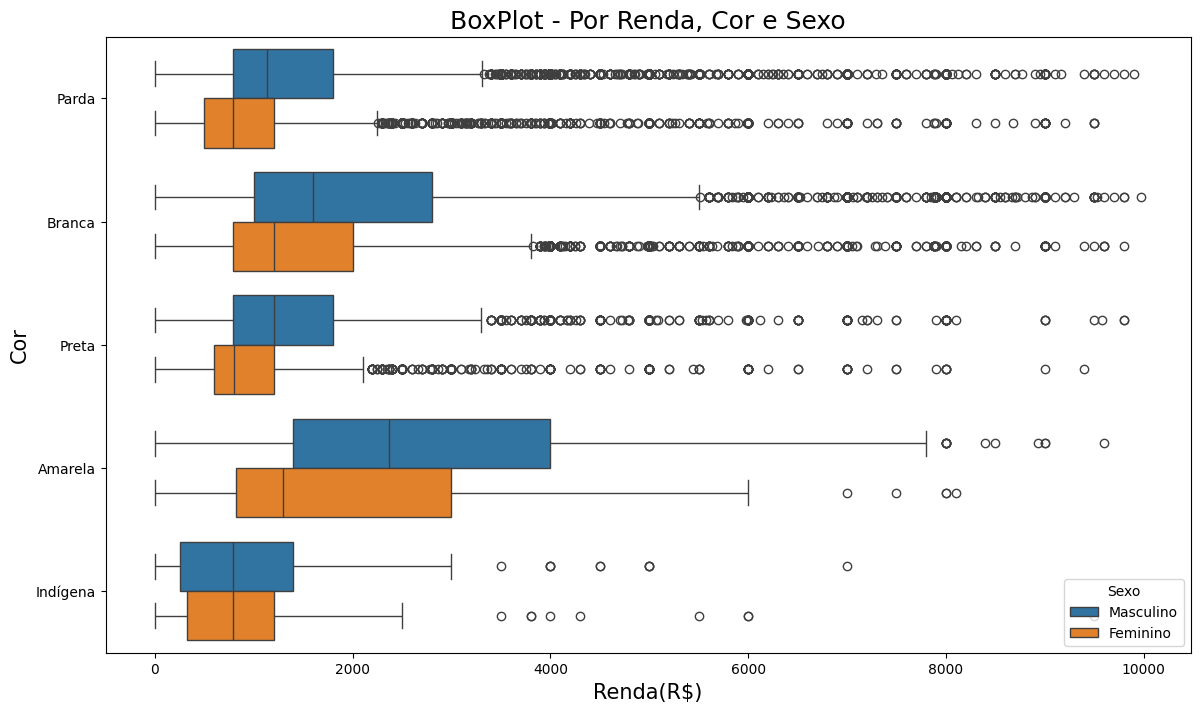

In [145]:
ax = sns.boxplot(x= 'Renda',
                 y='Cor',
                 data= dados_nomes_alterados.query('Renda <10000'),
                 hue= 'Sexo',
                 orient='h')
ax.figure.set_size_inches(14, 8)
ax.set_title('BoxPlot - Por Renda, Cor e Sexo', fontsize= 18)
ax.set_ylabel('Cor', fontsize=15)
ax.set_xlabel('Renda(R$)', fontsize=15)

ax

> ### Conclusões

A partir da visualização acima é perceptível que os homens independentemente da cor apresentam uma renda maior que a das mulheres. Além disso é observado no boxplot que a cor branca e amarela apresentam uma renda maior que as demais.

# <font color="lightblue">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='lightblue'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [158]:
from scipy import stats

stats.percentileofscore(dados.Renda, 788)

24.390942217595

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='lightblue'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [160]:
dados['Renda'].quantile(q= 0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='lightblue'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [164]:
pd.crosstab(index= dados['Anos de Estudo'],
            columns= dados_nomes_alterados.Sexo,
            values=dados_nomes_alterados.Renda,
            aggfunc= {'mean','median', 'max', 'std'})

max                   mean                median  \
Sexo           Feminino Masculino     Feminino    Masculino Feminino   
Anos de Estudo                                                         
1                 10000     30000   516.201748   799.494638    390.0   
2                  2000     30000   492.771987   895.629047    400.0   
3                  4000     40000   529.911638   931.178986    450.0   
4                  3500     80000   546.853916  1109.203862    500.0   
5                 10000     50000   704.279111  1302.329283    788.0   
6                  8000     35000   781.389776  1338.653218    788.0   
7                  6000     25000   833.732824  1448.875419    788.0   
8                  9000     40000   830.751004  1465.497940    788.0   
9                 18000     30000   933.615351  1639.396667    800.0   
10                20000     60000   868.021700  1508.038850    788.0   
11                 6000     45000   925.919225  1731.270847    800.0   
12               100000    200000  1286.790889  2117.060504   1000.0   
13               120000     30000  1682.313725  2470.330776   1200.0   
14                20000     25000  1911.730047  3195.099154   1300.0   
15                20000     50000  2226.460457  3706.620269   1600.0   
16               100000    200000  3899.513231  6134.279790   2800.0   
17                 3000      7000   798.174419  1295.761905    788.0   

                                  std               
Sexo           Masculino     Feminino    Masculino  
Anos de Estudo                                      
1                  700.0   639.311534  1023.904884  
2                  788.0   425.291842  1331.950552  
3                  788.0   498.234168  1435.173827  
4                  800.0   424.124446  2143.800133  
5                 1000.0   629.553397  1419.821787  
6                 1045.0   635.782641  1484.650587  
7                 1200.0   574.547028  1476.628602  
8                 1200.0   602.038029  1419.708673  
9                 1300.0   896.781213  1515.583715  
10                1200.0   973.221652  2137.664774  
11                1218.0   620.611907  2078.609734  
12                1500.0  1819.040417  2676.538942  
13                1800.0  4851.833513  2268.081538  
14                2400.0  2053.789771  2797.116800  
15                2500.0  2064.083336  3987.214974  
16                4000.0  4212.770709  7447.613594  
17                1200.0   459.985964   979.648745

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='lightblue'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='lightblue'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='lightblue'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'BoxPlot - Por Renda segundo Anos de Estudo e Sexo'}, xlabel='Renda(R$)', ylabel='Anos de Estudo'>

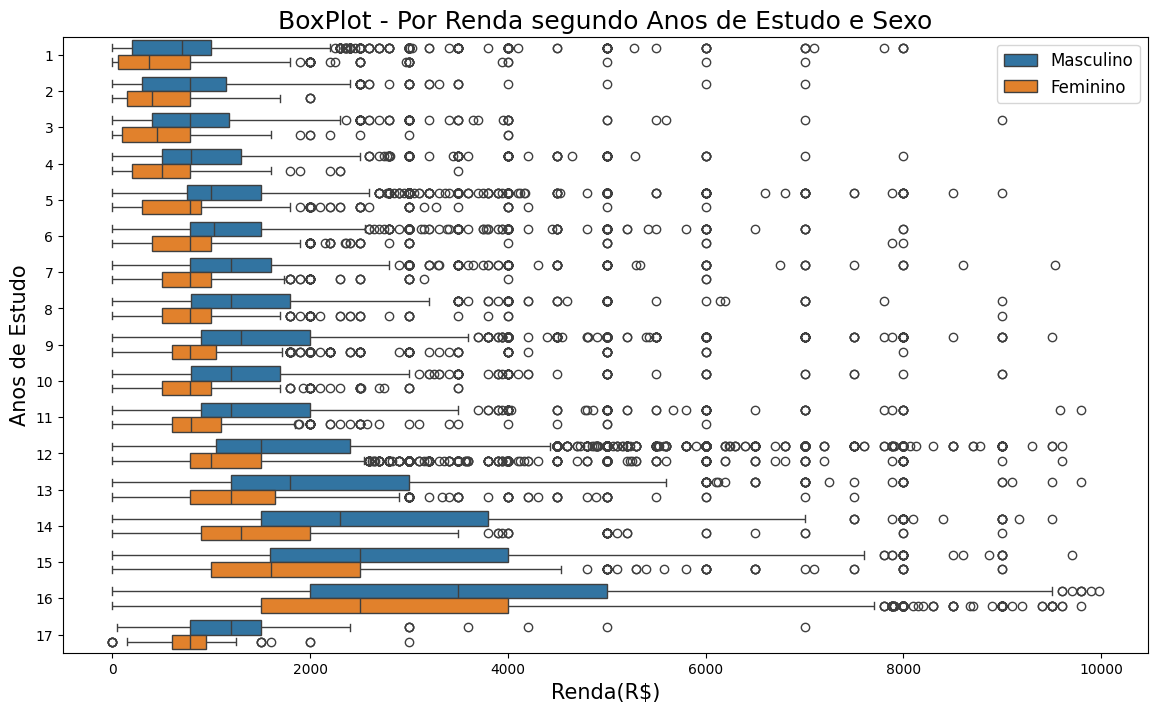

In [169]:
ax = sns.boxplot(x= 'Renda',
                 y='Anos de Estudo',
                 data= dados.query('Renda <10000'),
                 hue= 'Sexo',
                 orient='h')
ax.figure.set_size_inches(14, 8)
ax.set_title('BoxPlot - Por Renda segundo Anos de Estudo e Sexo', fontsize= 18)
ax.set_ylabel('Anos de Estudo', fontsize=15)
ax.set_xlabel('Renda(R$)', fontsize=15)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)
ax

> ### Conclusões

A partir da seguinte visualização, é possível visualizar que a maioria dos indivíduos da nossa população que no geral tiveram mais tempo de estudo, tendem a ter uma renda maior e isso se espelha para ambos os sexos.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='lightblue'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [171]:
dados_nomes_alterados.groupby(by='UF').agg({'Renda':['mean', 'median', 'max', 'std']})

Renda                             
                            mean  median     max          std
UF                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='lightblue'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<ipython-input-183-8201c1401d16>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x= 'Renda',


<Axes: title={'center': 'BoxPlot - Renda por UF'}, xlabel='Renda(R$)', ylabel='UF'>

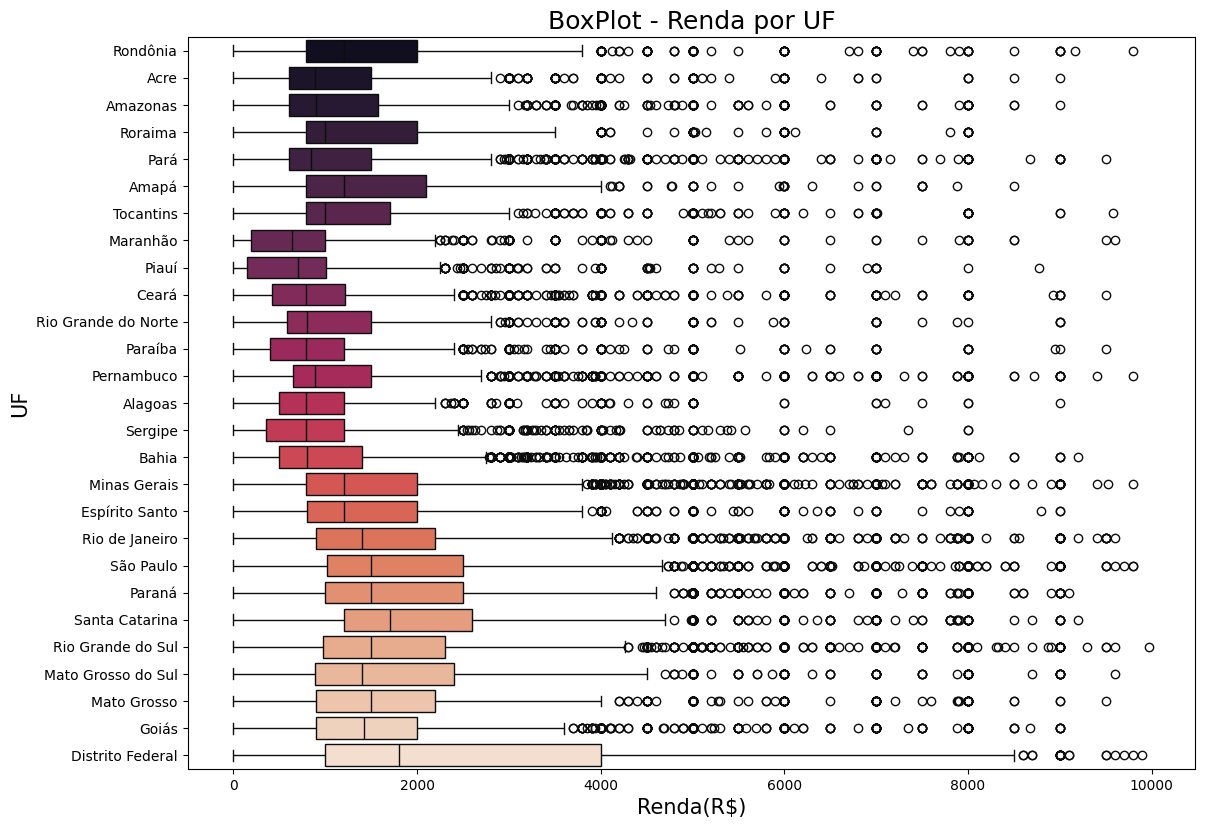

In [183]:
ax = sns.boxplot(x= 'Renda',
                 y='UF',
                 data= dados_nomes_alterados.query('Renda <10000'),
                 orient='h',
                 palette='rocket')
ax.figure.set_size_inches(13, 9.5)
ax.set_title('BoxPlot - Renda por UF', fontsize= 18)
ax.set_ylabel('UF', fontsize=15)
ax.set_xlabel('Renda(R$)', fontsize=15)

ax

> ### Conclusões

A partir do boxplot de renda por unidade de federação, é visível que algumas unidades apresentam uma renda maior que as demais como por exemplo o Distrito Federal. Assim como as unidades da região sudeste apresentam uma uma renda maior que as da região nordeste e norte.

Isto deve ocorrer porque cada estado apresenta um custo de vida diferente, além de algumas unidades apresentarem maior desenvolvimento.